In [2]:
from pycbc import detector
import numpy as np
import matplotlib.pyplot as plt

In [3]:
det = detector.Detector("H1")

In [4]:
alphas = np.linspace(0,2*np.pi,70)
deltaprimes = np.linspace(-1,1,70)
deltas = np.arcsin(deltaprimes)

In [16]:
fps = np.zeros((len(alphas),len(deltas)))
fcs = np.zeros((len(alphas),len(deltas)))

for ai,av in enumerate(alphas):
    for di,dv in enumerate(deltas):
        fp,fc = detector.overhead_antenna_pattern(av, dv, np.pi)
        fps[ai,di] = fp
        fcs[ai,di] = fc

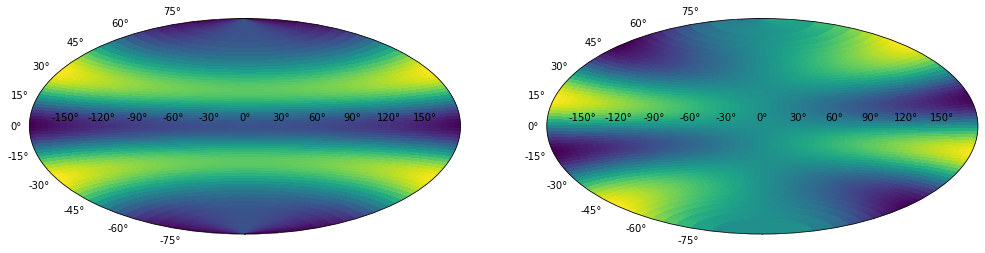

In [17]:
fig, ax = plt.subplots(ncols=2,figsize=(17,6), subplot_kw={'projection': "aitoff"})
X,Y = np.meshgrid(alphas-np.pi,deltas)
ax[0].pcolormesh(X,Y,fps)
ax[1].pcolormesh(X,Y,fcs)

In [55]:
fr = 1./9.9e-5
v1 = np.arcsin(fr*(1./1800)/200.)
v2 = np.arcsin(fr*(2./1800)/200.)
print(v1,v2)

0.028062044288642195 0.0561462173353401


In [58]:
print((v2-v1)*180/np.pi)

1.6091045866908527


In [60]:
((1./1800)/200)**2 

7.71604938271605e-12

In [59]:
1/np.sqrt(1 - ((1./1800)/200)**2 * 9.9e-5)

1.0000000000000004

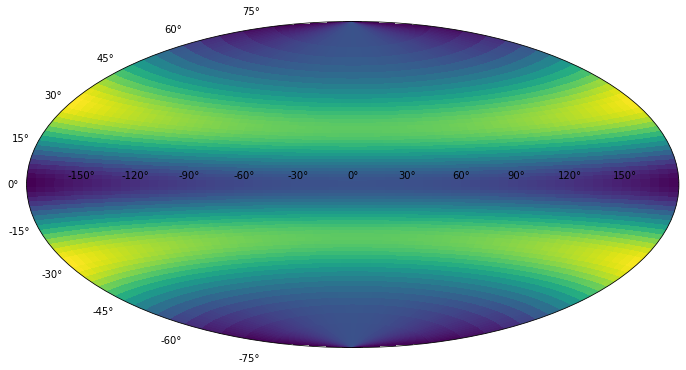

In [18]:
fig, ax = plt.subplots(ncols=1,figsize=(17,6), subplot_kw={'projection': "aitoff"})
X,Y = np.meshgrid(alphas-np.pi,deltas)
ax.pcolormesh(X,Y,fps)

In [19]:
fig.savefig("/Users/josephbayley/projects/thesis/testimg.png",dpi=10)